# Cyclum: hESC treated by nicotine

In [ ]:
# Add ../../ to path
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

import cyclum.tuning
import cyclum.models
from cyclum import writer

from cyclum.hdfrw import hdf2mat, mat2hdf

Using TensorFlow backend.


In [3]:
df = hdf2mat('/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357650-regular.h5')

In [4]:
model = cyclum.tuning.CyclumAutoTune(df.values, max_linear_dims=3, 
                                     epochs=100, rate=2e-4, verbose=20,
                                     encoder_width=[30, 20])

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 20/100, loss:  0.4489, time elapsed:  49.09s, time left:  196.36s
epoch: 40/100, loss:  0.4484, time elapsed:  96.65s, time left:  144.98s
epoch: 60/100, loss:  0.4484, time elapsed:  144.08s, time left:  96.05s
epoch: 80/100, loss:  0.4483, time elapsed:  191.70s, time left:  47.93s
epoch: 100/100, loss:  0.4483, time elapsed:  239.18s, time left:  0.00s
[0.4482765430012078]
[0.4485683207981298, 0.4459370355367693, 0.44347352349642827, 0.4413077548651841, 0.43997773094124826]
    1 linear dimensions...
epoch: 20/100, loss:  0.4461, time elapsed:  49.51s, time left:  198.04s
epoch: 40/100, loss:  0.4459, time elapsed:  98.46s, time left:  147.69s
epoch: 60/100, loss:  0.4458, time elapsed:  147.51s, time left:  98.34s
epoch: 80/100, loss:  0.445

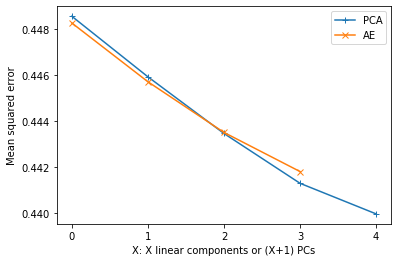

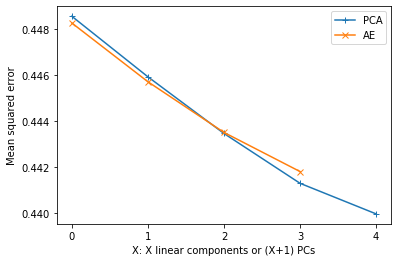

In [5]:
model.show_elbow()

In [6]:
model.train(df.values, epochs=300, rate=1e-4, verbose=30)

pseudotime = model.predict_pseudotime(df.values)

epoch: 30/300, loss:  0.4489, time elapsed:  74.62s, time left:  671.61s
epoch: 60/300, loss:  0.4482, time elapsed:  147.54s, time left:  590.15s
epoch: 90/300, loss:  0.4481, time elapsed:  220.18s, time left:  513.76s
epoch: 120/300, loss:  0.4481, time elapsed:  292.80s, time left:  439.19s
epoch: 150/300, loss:  0.4480, time elapsed:  365.49s, time left:  365.49s
epoch: 180/300, loss:  0.4480, time elapsed:  438.81s, time left:  292.54s
epoch: 210/300, loss:  0.4480, time elapsed:  511.44s, time left:  219.19s
epoch: 240/300, loss:  0.4480, time elapsed:  585.52s, time left:  146.38s
epoch: 270/300, loss:  0.4480, time elapsed:  660.78s, time left:  73.42s
epoch: 300/300, loss:  0.4480, time elapsed:  734.00s, time left:  0.00s


In [7]:
import pickle as pkl
with open('hESC.pkl', 'wb') as file:
    pkl.dump(pseudotime, file)

In [8]:
from cyclum.hdfrw import hdf2mat, mat2hdf
import pickle as pkl
with open('hESC.pkl', 'rb') as file:
    pseudotime = pkl.load(file)

mat2hdf(pseudotime, "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357650-pseudotime.h5")
mat2hdf(model.get_weight(), "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357650-weight.h5")
